<center>
    <header>
        <h1>Teorema del Campionamento e Modulazioni Analogiche</h1>
        <h2>Marco Bondaschi, Mauro Conte</h2>
        <h4>Laboratorio di Telecomunicazioni</h4>
        <h5>Università Degli Studi Di Brescia</h5>
        <h6>13/03/2017</h6>
    </header>
</center>
<hr><hr>

## Descrizione
In questa esperienza abbiamo studiato gli effetti che comporta un analisi numerica dei segnali.

In primo luogo abbiamo verificato il teorema del Shannon su semplici segnali sinusoidali per capire gli effetti di un campionamento fatto male.

Successivamente abbaiamo valutato cosa comporta il finestramento di un segnale a seconda anche del tipo di finestra scelto, operando su un segnale onda quadra e una sinusoide

Infine abbiamo studiato due tra le principali modulazioni analogiche AM e FM

- $s_1\left(t\right) = sin\left(2\pi f_1 t\right)$ con  $f_1 = 200\:kHz$

- $s_2\left(t\right) = sin\left(2\pi f_2 t\right)$ con  $f_2 = 300\:KHz$

<h2>Strumenti</h2>

Per raggiungere questi obiettivi abbiamo utilizzato i seguenti strumenti:
<ul>
<li>Oscilloscopio digitale <i>Agilent Technologies InfiniiVision MSO-X 3014A</i></li>
<li>Oscilloscopio <i>l'altro</i></li>
<li>Generatore di segnali analogico <i>HP 33120A</i></li>
</ul>

## Teorema di Shannon

Dato un segnale $s\left(t\right)$ la cui banda è limitata dalla frequenaz $f_M$, allora $s\left(t\right)$ può essere univocamente ricostruito dai suoi campioni presi a una frequenza $f_c>2f_M$

Abbiamo generato la sinusoide $x\left(t\right)=sin(2\pi f_0 t)$ con $f_0 = 200KHz$ e ne abbiamo visualizzato lo spettro.

Il modulo dello spettro della sinusode risulta essere una delta di Dirac definita in $f_0$.

Variando la frequenza della sinusoide la delta si sposta nella nuova frequenza.

Quando la frequenza della sinusoide supera i 250kHz lo spettro visualizzato non coincide piu con lo spettro del segnale originale, da cui anche l'impossibilità di ricostruirlo. Ciò accade perchè l'oscilloscopio effettua un campionamento sul segnale a 500kHz. 

Se la frequenza fondamentale del segnale di ingresso supera i 250KHz non è rispettato il teorema di Shannon e sull'oscilloscopio si visualizzano gli alias delle frequenze del segnale cioè le repliche periodiche dello spettro del segnale d'ingresso centrate alla frequenza di campionamento che risultano essre frequenze non presenti nel segnale originale.

Una sinusoide a 200kHz risulta quindi indistinguibile da una sinusoide a 300kHz se campionate a 500kHz.

## Simulazione dei risultati

Abbiamo simulato l'esperienza per verificare il risultato ottenuto

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

TIME_W = 1e-3  #larghezza della finestra
Fc = 5e5       #frequenza di ccampionamento
Tc = 1/Fc      #tempo di campionamento
Nc = Fc*TIME_W #Numero di campioni

ax_t = np.linspace(0,TIME_W, Fc) #asse dei tempi Fc punti deve dare l'effetto di una sinusoide analogica
ax_tc = np.linspace(0,TIME_W,Nc) #asse dei tempi campionato

f1 = 2e5
x1 = np.sin(2*np.pi*f1*ax_t)
x1c = np.sin(2*np.pi*f1*ax_tc)

f2 = 3e5
x2 = np.sin(2*np.pi*f2*ax_t)
x2c = np.sin(2*np.pi*f2*ax_tc)

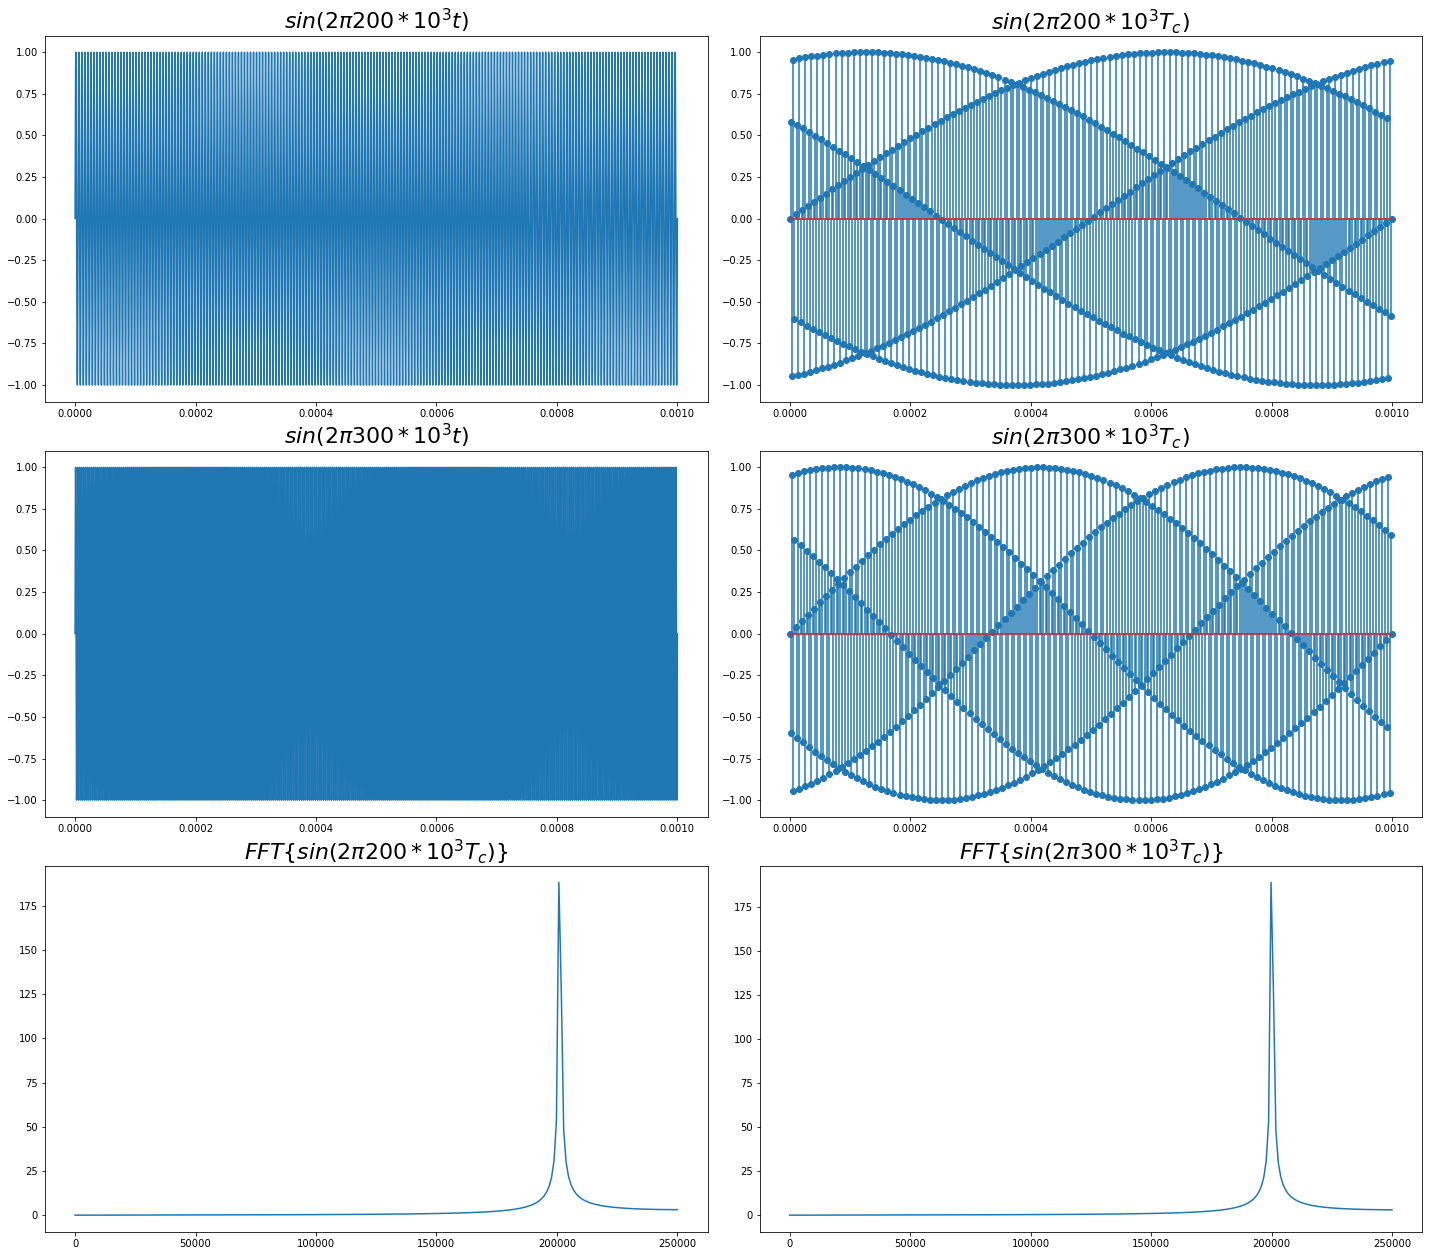

In [4]:
gs = gridspec.GridSpec(3, 2)

figure = plt.figure(figsize=(20,20))
plt.subplot(gs[0,0])
plt.plot(ax_t,x1)
plt.title("$sin(2\pi{200*10^3}t)$",fontsize=22, fontweight='bold')

plt.subplot(gs[0,1])
plt.stem(ax_tc,x1c)
plt.title("$sin(2\pi{200*10^3}T_c)$",fontsize=22, fontweight='bold')

plt.subplot(gs[1,0])
plt.plot(ax_t,x2)
plt.title("$sin(2\pi{300*10^3}t)$",fontsize=22, fontweight='bold')

plt.subplot(gs[1,1])
plt.stem(ax_tc,x2c)
plt.title("$sin(2\pi{300*10^3}T_c)$",fontsize=22, fontweight='bold')

plt.subplot(gs[2,0])
X1c = np.fft.fft(x1c)
axf = np.linspace(0.0, 1/(2*Tc), int((TIME_W*Fc))//2)
plt.plot(axf,np.abs(X1c[0:(int((TIME_W*Fc))//2)]))
plt.title("$FFT\{sin(2\pi{200*10^3}T_c)\}$",fontsize=22, fontweight='bold')

plt.subplot(gs[2,1])
X2c = np.fft.fft(x2c)
axf = np.linspace(0.0, 1.0/(2*Tc), 500//2)
plt.plot(axf,np.abs(X2c[0:(500//2)]))
plt.title("$FFT\{sin(2\pi{300*10^3}T_c)\}$",fontsize=22, fontweight='bold')

plt.tight_layout()
figure.subplots_adjust(top=0.85)
plt.show()

Le due sinusoidi in frequenza risultano indistinguibili

## Influenza della finestra

### Onda Quadra

Abbiamo generato un onda quadra alla frequenza 2000Hz e ne abbiamo visualizzato lo spettro sull'oscilloscopio variando la finestra di acquisizione utilizzata.

Lo spettro di un onda quadra è non nullo per multipli dispari della frequenza di campionamento e poichè il segnale ha discontinuità alla derivata di ordine zero descresce come $\frac{1}{f}$((devo provare a controllare i numerini))

Siamo interessati alla posizione e all'ampiezza dei picchi nello spettro.

<table>
    <tr>
        <td colspan="2">Rettangolare</td>
        <td colspan="2">Hamming</td>
        <td colspan="2">FlatTop</td>
        <td colspan="2">Blackman Harris</td>
    </tr>
    <tr>
        <td>Posizione [kHz]</td><td>Ampiezza [mV]</td>
        <td>Posizione [kHz]</td><td>Ampiezza [mV]</td>
        <td>Posizione [kHz]</td><td>Ampiezza [mV]</td>
        <td>Posizione [kHz]</td><td>Ampiezza [mV]</td>
    </tr>
    <tr>
        <td>2</td><td>1830</td>
        <td>2</td><td>1680</td>
        <td>3</td><td>1810</td>
        <td>2</td><td>1750</td>
    </tr>
    <tr>
        <td>6</td><td>552,7</td>
        <td>6</td><td>552,7</td>
        <td>7,36</td><td>643,3</td>
        <td>6</td><td>577,5</td>
    </tr>
    <tr>
        <td>10</td><td>353,3</td>
        <td>10</td><td>344,3</td>
        <td>11,56</td><td>392,6</td>
        <td>10</td><td>352,3</td>
    </tr>
    <tr>
        <td>14</td><td>253,7</td>
        <td>14</td><td>235,6</td>
        <td>15,6</td><td>294</td>
        <td>14</td><td>244,5</td>
    </tr>
    <tr>
        <td>18</td><td>199,3</td>
        <td>18</td><td>190,3</td>
        <td>19.7</td><td>234</td>
        <td>18</td><td>193,8</td>
    </tr>
<table>

### Sinusoide
<table>
    <tr>
        <td colspan="2">Rettangolare</td>
        <td colspan="2">Hamming</td>
        <td colspan="2">FlatTop</td>
        <td colspan="2">Blackman Harris</td>
    </tr>
    <tr>
        <td>Posizione [kHz]</td><td>Ampiezza [mV]</td>
        <td>Posizione [kHz]</td><td>Ampiezza [mV]</td>
        <td>Posizione [kHz]</td><td>Ampiezza [mV]</td>
        <td>Posizione [kHz]</td><td>Ampiezza [mV]</td>
    </tr>
    <tr>
        <td>2</td><td>1400</td>
        <td>2</td><td>1320</td>
        <td>2,45</td><td>1370</td>
        <td>1,92</td><td>1370</td>
    </tr>

<table>

## Modulazione AM

Nella modulazione AM si utilizza un segnale in bassa frequenza detto modulante per variare l'ampiezza di un segnale in alta frequenza detto portante.

Utilizzando il generatore di funzioni abbiamo generato un segnale AM con frequenza portante di 100kHz e frequenza del segnale modulane di 1kHz.

$c\left(t\right) = Acos\left(2\pi f_c t\right)$

$m\left(t\right) = Bcos\left(2\pi f_m t\right)$

Il segnale modulato risulta avere la seguente espressione analitica $s_{AM}\left(t\right) = A\left[1 + m_acos\left(2\pi f_m t\right)\right]cos\left(2\pi f_c t\right)$


## Modulazione FM

Nella modulazione FM si utilizza un segnale in bassa frequenza detto modulante per variare la frequenza istantanea di un segnale detto portante.

La frequenza istantanea del segnale modulato vale $f_i\left(t\right) = f_c + k_fm\left(t\right)$  
dove

- $k_{f}$ è una costante che viene detta fattore di sensibilità in frequenza del modulatore
- $m\left(t\right)$ è il segnale modulante
- $f_{c}$ è la frequenza della portante non modulata

$\theta_i\left(t\right) = 2\pi\int_{0}^{t}f_i\left(\tau\right)d\tau = 2\pi f_ct + 2\pi k_f\int_{0}^{t}m\left(\tau\right)d\tau $

#### Regola di carson
Un segnale modulato in frequenza teoricamente occupa una banda illimitata ma si può osservare che a una certa distanza dalla portante i contriuti spettrali diventano via via piu trascurabili. La banda di un segnale FM puuò quindi essere ben approssimata attraverso la regla di Carson: $B_{FM} = 2\Delta{F}+2f_m$